In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

display(HTML('<script> $(document).ready(function() { $("div.input").hide(); }); </script>'))

## Negatív visszacsatolású rendszerek

A példa bemutatja a negatív visszacsatolás hatását lineáris időinvariáns (LTI) rendszerekre. A kimenete az eredeti rendszernek ($G(s)$) kivonásra kerül a bemeneti jelből, negatív visszacsatolást hozva létre. Opcionálisan a visszacsatoló ág maga is tartalmazhat egy LTI rendszert ($H(s)$), ami módosítja a kimenő jelet a visszacsatolás előtt.

<img src="Images/NFB.png" width="40%" />

A visszacsatolt (zárt körű) rendszer átviteli függvénye az alábbi módon határozható meg:

$$G_{cl}(s)=\frac{G(s)}{1+H(s)G(s)},$$

Ahol a $+$ előjel a negatív visszacsatolásból származik. Pozitív visszacsatolás esetén az előjel negatív.<br> 
A felnyitott körű rendszer a bemenettől a visszacsatolásig értelmezett, a visszacsatolás nélkül:

$$G_{ol}(s)=H(s)G(s)$$

Egy negatív visszacsatolású rendszer elemzésekor a vizsgálatok egy részét a felnyitott körön kell elvégezni.

<br><b>Válassza ki a vizsgálat típusát!</b>

In [2]:
# Example mode selector
typeSelect = w.ToggleButtons(
    options=[('Pólus-zérus görbe', 0), ('Bode diagram', 1), ('Nyquist diagram', 2)],
    description='Rendszer: ', layout=w.Layout(width='100%'))

display(typeSelect)

ToggleButtons(description='Rendszer: ', layout=Layout(width='100%'), options=(('Pólus-zérus görbe', 0), ('Bode…

<br><b>Állítsa össze az átviteli függvényeit az előre és visszacsatoló ágaknak!</b>

In [3]:
b = {}
a = {}
e = {}
f = {}

b[0] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))
b[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))
b[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))

a[0] = w.FloatText(value=10.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))
a[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))
a[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))
a[3] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))

f[0] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='24%'))
f[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='24%'))

e[0] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='24%'))
e[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='24%'))
e[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='24%'))

def transfer_function(a0, a1, a2, a3, b0, b1, b2, e0, e1, e2, f0, f1):

    b1c = b1
    b2c = b2
    f1c = f1
    
    global b, f
       
    if a3 == 0:
        b[2].disabled=True
        b2c = 0
    else:
        b[2].disabled=False    
        
    if a3 == 0 and a2 == 0:
        b[1].disabled=True
        b1c = 0
    else:
        b[1].disabled=False   
    
    
    if e2 == 0:
        f[1].disabled=True
        f1c = 0
    else:
        f[1].disabled=False
    
    
    G = c.tf([b2c, b1c, b0], [a3, a2, a1, a0]) # Feedforward transfer function
    H = c.tf([f1c, f0], [e2, e1, e0]) # Feedback transfer function

    print('Előrecsatoló átviteli függvény:')
    print(G)
    print('Visszacsatoló átviteli függvény:')
    print(H)

input_data = w.interactive_output(transfer_function, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3],
                                                      'b0':b[0], 'b1':b[1], 'b2':b[2],
                                                      'e0':e[0], 'e1':e[1], 'e2':e[2],
                                                      'f0':f[0], 'f1':f[1]})

display(w.VBox([
        w.HBox([w.VBox([w.Label('$G(s)=$')], layout=w.Layout(justify_content="center", align_items='flex-start')),
        w.VBox([w.HBox([b[2], w.Label('$s^2+$'), b[1], w.Label('$s+$'), b[0]],
                       layout=w.Layout(justify_content='center')),
                w.HBox([w.HTML(value='<hr style="border-top: 1px solid black">', layout=w.Layout(width='100%'))],
                       layout=w.Layout(justify_content='center')),
                w.HBox([a[3], w.Label('$s^3+$'), a[2], w.Label('$s^2+$'), a[1], w.Label('$s+$'), a[0]],
                       layout=w.Layout(justify_content='center')) ],
                layout=w.Layout(width='50%'))], layout=w.Layout(justify_content='center') ),
        w.HTML(value='<br><br>'),
        w.HBox([w.VBox([w.Label('$H(s)=$')], layout=w.Layout(justify_content="center", align_items='flex-start')),
        w.VBox([w.HBox([f[1], w.Label('$s+$'), f[0]],
                       layout=w.Layout(justify_content='center')),
                w.HBox([w.HTML(value='<hr style="border-top: 1px solid black">', layout=w.Layout(width='100%'))],
                       layout=w.Layout(justify_content='center')),
                w.HBox([e[2], w.Label('$s^2+$'), e[1], w.Label('$s+$'), e[0]],
                       layout=w.Layout(justify_content='center')) ],
                layout=w.Layout(width='35%'))], layout=w.Layout(justify_content='center') )
       ]), input_data)

Output()

A megadott rendszerkomponensek alapján az felnyitott és a zárt kör rendszermodelljei meghatározhatóak.

In [4]:
def feedback_function(a0, a1, a2, a3, b0, b1, b2, e0, e1, e2, f0, f1):

    b1c = b1
    b2c = b2
    
    f1c = f1
    
    global b, f
       
    if a3 == 0:
        b2c = 0 
        
    if a3 == 0 and a2 == 0:
        b1c = 0    
    
    if e2 == 0:
        f1c = 0
    
    G = c.tf([b2c, b1c, b0], [a3, a2, a1, a0]) # Feedforward transfer function
    H = c.tf([f1c, f0], [e2, e1, e0]) # Feedback transfer function
    
    Wol = c.series(G, H)
    Wcl = c.feedback(G, H, -1)
    
    print('Felnyitott kör átviteli függvénye:')
    print(Wol)
    print('Zárt kör átviteli függvénye:')
    print(Wcl)
    
w.interactive_output(feedback_function, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3],
                                         'b0':b[0], 'b1':b[1], 'b2':b[2],
                                         'e0':e[0], 'e1':e[1], 'e2':e[2],
                                         'f0':f[0], 'f1':f[1]})

Output()

<b>Figyelje meg a két rendszer impulzus- és egységugrás válaszának különbségeit!</b>

<IPython.core.display.Javascript object>


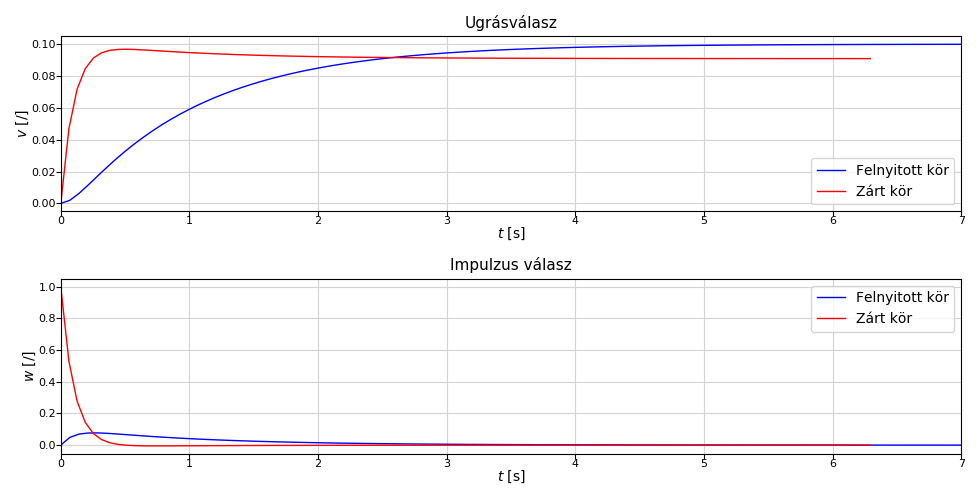

Output()

In [5]:
# Figure definition

fig1, (f1_ax1, f1_ax2) = plt.subplots(2, 1)
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [], lw=1, color='blue')
f1_line2, = f1_ax1.plot([], [], lw=1, color='red')
f1_line3, = f1_ax2.plot([], [], lw=1, color='blue')
f1_line4, = f1_ax2.plot([], [], lw=1, color='red')

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='x', tight=True)
f1_ax2.autoscale(enable=True, axis='x', tight=True)
f1_ax1.autoscale(enable=True, axis='y', tight=False)
f1_ax2.autoscale(enable=True, axis='y', tight=False)

f1_ax1.set_title('Ugrásválasz', fontsize=11)
f1_ax1.set_xlabel(r'$t\/\/$[s]', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$v\/\/$[/]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Impulzus válasz', fontsize=11)
f1_ax2.set_xlabel(r'$t\/\/$[s]', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$w\/\/$[/]', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax1.legend([f1_line1, f1_line2], ['Felnyitott kör', 'Zárt kör'], loc='lower right')
f1_ax2.legend([f1_line3, f1_line4], ['Felnyitott kör', 'Zárt kör'], loc='upper right')


def time_analysis(a0, a1, a2, a3, b0, b1, b2, e0, e1, e2, f0, f1):

    b1c = b1
    b2c = b2
    
    f1c = f1
    
    global b, f
       
    if a3 == 0:
        b2c = 0 
        
    if a3 == 0 and a2 == 0:
        b1c = 0    
    
    if e2 == 0:
        f1c = 0
    
    G = c.tf([b2c, b1c, b0], [a3, a2, a1, a0]) # Feedforward transfer function
    H = c.tf([f1c, f0], [e2, e1, e0]) # Feedback transfer function
    
    Wol = c.series(G, H)
    Wcl = c.feedback(G, H, -1)
    
    Ts_ol, step_ol = c.step_response(Wol)
    Ts_cl, step_cl = c.step_response(Wcl)
    Ti_ol, imp_ol = c.impulse_response(Wol)
    Ti_cl, imp_cl = c.impulse_response(Wcl)
    
    global f1_line1, f1_line2, f1_line3, f1_line4
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax1.lines.remove(f1_line2)
    f1_ax2.lines.remove(f1_line3)
    f1_ax2.lines.remove(f1_line4)

    f1_line1, = f1_ax1.plot(Ts_ol, step_ol, lw=1, color='blue')
    f1_line2, = f1_ax1.plot(Ts_cl, step_cl, lw=1, color='red')
    f1_line3, = f1_ax2.plot(Ti_ol, imp_ol, lw=1, color='blue')   
    f1_line4, = f1_ax2.plot(Ti_cl, imp_cl, lw=1, color='red')
    
    f1_ax1.relim()
    f1_ax2.relim()
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()   
    
w.interactive_output(time_analysis, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3],
                                     'b0':b[0], 'b1':b[1], 'b2':b[2],
                                     'e0':e[0], 'e1':e[1], 'e2':e[2],
                                     'f0':f[0], 'f1':f[1]})

<b>Hasonlítsa össze a két rendszer frekvencia tartományú jellemzőit!</b>

<IPython.core.display.Javascript object>


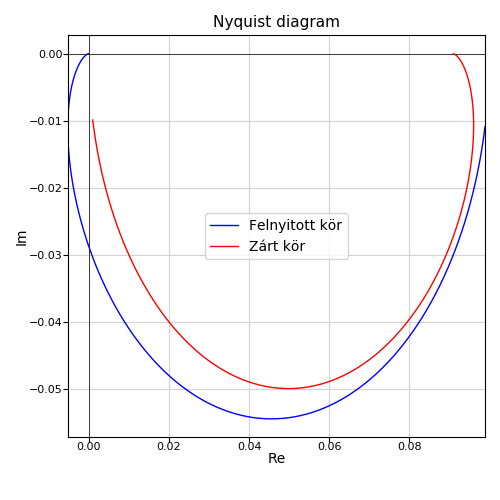

Output()

In [7]:
fig2, (f2_ax1, f2_ax2) = plt.subplots(2, 1)
fig2.set_tight_layout(True)
grid2 = f2_ax1.get_gridspec()

f2_line1, = f2_ax1.plot([], [])
f2_line2, = f2_ax1.plot([], [])
f2_line3, = f2_ax1.plot([], [])
f2_line4, = f2_ax1.plot([], [])
f2_line5, = f2_ax2.plot([], [])
f2_line6, = f2_ax2.plot([], [])

f2_line7 = f2_ax1.axhline(y=0, color='k', lw=0.5)
f2_line8 = f2_ax1.axvline(x=0, color='k', lw=0.5)

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax2.grid(which='both', axis='both', color='lightgray')

def type_analysis(a0, a1, a2, a3, b0, b1, b2, e0, e1, e2, f0, f1, typeSelect):

    b1c = b1
    b2c = b2
    f1c = f1
    
    global b, f
       
    if a3 == 0:
        b2c = 0 
        
    if a3 == 0 and a2 == 0:
        b1c = 0    
    
    if e2 == 0:
        f1c = 0
    
    G = c.tf([b2c, b1c, b0], [a3, a2, a1, a0]) # Feedforward transfer function
    H = c.tf([f1c, f0], [e2, e1, e0]) # Feedback transfer function
    
    Wol = c.series(G, H)
    Wcl = c.feedback(G, H, -1)
    
    global fig2, grid2, f2_ax1, f2_ax2, f2_line1, f2_line2, f2_line3, f2_line4, f2_line5, f2_line6, f2_line7, f2_line8
    
    try:
        f2_ax1.lines.remove(f2_line1)
        f2_ax1.lines.remove(f2_line2)
        f2_ax1.lines.remove(f2_line3)
        f2_ax1.lines.remove(f2_line4)
        f2_ax2.lines.remove(f2_line5)
        f2_ax2.lines.remove(f2_line6)
    except:
        pass
    
    if typeSelect == 0: # Pole-Zero map
        
        fig2.set_size_inches((5, 5))
        f2_ax2.set_visible(False)
        grid2.set_height_ratios([100, 1])
        
        p_ol, z_ol = c.pzmap(Wol, Plot=False)
        p_cl, z_cl = c.pzmap(Wcl, Plot=False)
        
        f2_ax1.autoscale(enable=True, axis='both', tight=False) 
        
        px_ol = [x.real for x in p_ol] 
        py_ol = [x.imag for x in p_ol]
        zx_ol = [x.real for x in z_ol]
        zy_ol = [x.imag for x in z_ol]
        
        px_cl = [x.real for x in p_cl] 
        py_cl = [x.imag for x in p_cl]
        zx_cl = [x.real for x in z_cl]
        zy_cl = [x.imag for x in z_cl]
        
        f2_line1, = f2_ax1.plot(zx_ol, zy_ol, 'rs', fillstyle='none') 
        f2_line2, = f2_ax1.plot(px_ol, py_ol, 'bo', fillstyle='none')
        f2_line3, = f2_ax1.plot(zx_cl, zy_cl, 'm^', fillstyle='none') 
        f2_line4, = f2_ax1.plot(px_cl, py_cl, 'cD', fillstyle='none')
        f2_line5, = f2_ax2.plot([], [])
        f2_line6, = f2_ax2.plot([], [])
        
        f2_line7.set_visible(True)
        f2_line8.set_visible(True)
        
        f2_ax1.set_title('Pólus-zérus görbe', fontsize=11)
        f2_ax1.set_xscale('linear')
        f2_ax1.set_xlabel(r'Re', labelpad=0, fontsize=10)
        f2_ax1.set_ylabel(r'Im', labelpad=0, fontsize=10)
        f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)
        
        f2_ax1.legend((f2_line1, f2_line2, f2_line3, f2_line4),
                      ('Zérus (Felnyitott kör)', 'Pólus (Felnyitott kör)', 'Zérus (Zárt kör)', 'Pólus (Zárt kör)'))
    
    elif typeSelect == 1: # Bode plot
        
        fig2.set_size_inches((9.6, 5))
        f2_ax2.set_visible(True)
        grid2.set_height_ratios([1, 1])
        
        m_ol, p_ol, o_ol = c.bode(Wol, Plot=False)
        m_cl, p_cl, o_cl = c.bode(Wcl, Plot=False)
        
        f2_ax1.autoscale(enable=True, axis='x', tight=True)
        f2_ax2.autoscale(enable=True, axis='x', tight=True)
        f2_ax1.autoscale(enable=True, axis='y', tight=False)
        f2_ax2.autoscale(enable=True, axis='y', tight=False)
        
        f2_line1, = f2_ax1.plot(o_ol, m_ol, lw=1, color='blue') 
        f2_line2, = f2_ax1.plot(o_cl, m_cl, lw=1, color='red')
        f2_line3, = f2_ax1.plot([], [])
        f2_line4, = f2_ax1.plot([], [])
        f2_line5, = f2_ax2.plot(o_ol, p_ol, lw=1, color='blue')
        f2_line6, = f2_ax2.plot(o_cl, p_cl, lw=1, color='red')
        
        f2_line7.set_visible(False)
        f2_line8.set_visible(False)
        
        f2_ax1.set_title('Bode amplitúdó diagram', fontsize=11)
        f2_ax1.set_xscale('log')
        f2_ax1.set_xlabel(r'$\omega\/[\frac{rad}{s}]$', labelpad=0, fontsize=10)
        f2_ax1.set_ylabel(r'$A\/[dB]$', labelpad=0, fontsize=10)
        f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

        f2_ax2.set_title('Bode fázis diagram', fontsize=11)
        f2_ax2.set_xscale('log')
        f2_ax2.set_xlabel(r'$\omega\/[\frac{rad}{s}]$', labelpad=0, fontsize=10)
        f2_ax2.set_ylabel(r'$\phi\/[°]$', labelpad=0, fontsize=10)
        f2_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)
        
        f2_ax1.legend((f2_line1, f2_line2), ('Felnyitott kör', 'Zárt kör'))
        f2_ax2.legend((f2_line5, f2_line6), ('Felnyitott kör', 'Zárt kör'))
        
    else: # Nyquist plot
        
        fig2.set_size_inches((5, 5))
        f2_ax2.set_visible(False)
        grid2.set_height_ratios([100, 1])
        
        _, _, ob_ol = c.nyquist_plot(Wol, Plot=False)   # Small resolution plot to determine bounds  
        _, _, ob_cl = c.nyquist_plot(Wcl, Plot=False)
          
        r_ol, i_ol, _ = c.nyquist(Wol, omega=np.logspace(np.log10(ob_ol[0]), np.log10(ob_ol[-1]), 1000), Plot=False)
        r_cl, i_cl, _ = c.nyquist(Wcl, omega=np.logspace(np.log10(ob_cl[0]), np.log10(ob_cl[-1]), 1000), Plot=False)
        
        f2_ax1.autoscale(enable=True, axis='both', tight=False)
        
        f2_line1, = f2_ax1.plot(r_ol, i_ol, lw=1, color='blue') 
        f2_line2, = f2_ax1.plot(r_cl, i_cl, lw=1, color='red')
        f2_line3, = f2_ax1.plot([], [])
        f2_line4, = f2_ax1.plot([], [])
        f2_line5, = f2_ax2.plot([], [])
        f2_line6, = f2_ax2.plot([], [])
        
        f2_line7.set_visible(True)
        f2_line8.set_visible(True)
        
        f2_ax1.set_title('Nyquist diagram', fontsize=11)
        f2_ax1.set_xscale('linear')
        f2_ax1.set_xlabel(r'Re', labelpad=0, fontsize=10)
        f2_ax1.set_ylabel(r'Im', labelpad=0, fontsize=10)
        f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)
        
        f2_ax1.legend((f2_line1, f2_line2), ('Felnyitott kör', 'Zárt kör'))
        
    f2_ax1.relim(visible_only=True)
    f2_ax2.relim(visible_only=True)
    f2_ax1.autoscale_view()
    f2_ax2.autoscale_view() 
        
    
w.interactive_output(type_analysis, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3],
                                     'b0':b[0], 'b1':b[1], 'b2':b[2],
                                     'e0':e[0], 'e1':e[1], 'e2':e[2],
                                     'f0':f[0], 'f1':f[1], 'typeSelect':typeSelect})   